In [1]:
# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyIEEM.models.utils import initialize_SIR

In [384]:
country = 'BE'
spatial = True
age_classes = pd.IntervalIndex.from_tuples([(0,5),(5,10),(10,15),(15,20),(20,25),(25,30),(30,35),(35,40),(40,45),(45,50),(50,55),(55,60),(60,65),(65,70),(70,75),(75,80),(80,120)], closed='left')

In [389]:
model = initialize_SIR(country, age_classes, spatial=spatial, contact_type='absolute_contacts')

2019-12-01 00:00:00 11.267423889318607 15.49707486890128
2019-12-01 00:17:27.064972 11.267423889318607 15.49707486890128
2019-12-01 00:18:09.771950 11.267423889318607 15.49707486890128
2019-12-01 00:27:14.657925 11.267423889318607 15.49707486890128
2019-12-01 00:36:19.543900 11.267423889318607 15.49707486890128
2019-12-01 03:37:57.263401 11.267423889318607 15.49707486890128
2019-12-01 05:08:46.123151 11.267423889318607 15.49707486890128
2019-12-01 06:39:34.982902 11.267423889318607 15.49707486890128
2019-12-01 23:02:44.752035 11.267423889318607 15.49707486890128
2019-12-02 07:14:19.636602 11.267423889318607 15.49707486890128
2019-12-02 15:25:54.521169 11.267423889318607 15.49707486890128
2019-12-03 13:29:24.503210 11.267423889318607 15.49707486890128
2019-12-04 00:31:09.494230 11.267423889318607 15.49707486890128
2019-12-04 11:32:54.485251 11.267423889318607 15.49707486890128
2019-12-05 14:42:49.001786 11.267423889318607 15.49707486890128
2019-12-06 04:17:46.260054 11.267423889318607 1

2020-04-23 17:17:22.894587 6.719331114600464 8.09036113856691
2020-04-27 00:54:42.216101 6.719331114600464 8.09036113856691
2020-04-30 08:32:01.537616 6.719331114600464 8.09036113856691
2020-04-18 13:27:07.962167 6.719331114600464 8.09036113856691
2020-04-19 07:09:19.817471 6.719331114600464 8.09036113856691
2020-04-20 00:51:31.672776 6.719331114600464 8.09036113856691
2020-04-21 12:15:55.383385 6.719331114600464 8.09036113856691
2020-04-22 05:58:07.238689 6.719331114600464 8.09036113856691
2020-04-22 23:40:19.093994 6.719331114600464 8.09036113856691
2020-04-25 04:27:40.110179 6.719331114600464 8.09036113856691
2020-04-26 06:51:20.618271 6.719331114600464 8.09036113856691
2020-04-27 09:15:01.126364 6.719331114600464 8.09036113856691
2020-04-30 09:15:24.387006 6.719331114600464 8.09036113856691
2020-05-01 21:15:36.017326 6.719331114600464 8.09036113856691
2020-05-03 09:15:47.647647 6.719331114600464 8.09036113856691
2020-05-06 18:18:02.587774 6.719331114600464 8.09036113856691
2020-05-

2020-03-28 01:08:26.297301 3.4053104757609036 5.414913718735413
2020-03-29 14:32:27.421149 3.4053104757609036 5.414913718735413
2020-03-26 01:44:53.587922 3.4053104757609036 5.414913718735413
2020-03-27 10:09:08.919004 3.4053104757609036 5.414913718735413
2020-03-28 18:33:24.250086 3.4053104757609036 5.414913718735413
2020-03-31 11:21:54.912250 3.4053104757609036 5.414913718735413
2020-04-01 19:46:10.243332 3.4053104757609036 5.414913718735413
2020-04-03 04:10:25.574414 3.4053104757609036 5.414913718735413
2020-04-07 12:02:29.106282 3.4053104757609036 5.414913718735413
2020-04-09 15:58:30.872217 3.4053104757609036 5.414913718735413
2020-04-11 19:54:32.638151 3.4053104757609036 5.414913718735413
2020-04-05 00:10:06.303176 3.4053104757609036 5.414913718735413
2020-04-05 22:09:56.667557 3.4053104757609036 5.414913718735413
2020-04-06 20:09:47.031939 3.4053104757609036 5.414913718735413
2020-04-08 16:09:27.760701 3.4053104757609036 5.414913718735413
2020-04-09 14:09:18.125083 3.40531047576

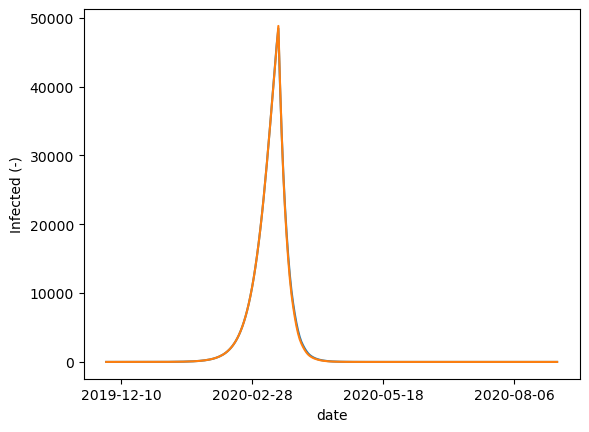

In [390]:
fig,ax = plt.subplots()

# everything open
model.parameters['economic_policy'].loc['G47'] = 1
model.parameters['economic_policy'].loc['I55-56'] = 1
model.parameters['economic_policy'].loc['R90-92'] = 1
model.parameters['economic_policy'].loc['R93'] = 1
model.parameters['economic_policy'].loc['S94'] = 1
model.parameters['economic_policy'].loc['S96'] = 1

out = model.sim(['2019-12-01', '2020-09-01'])
ax.plot(out.date, out.I.sum(dim=['age_class', 'spatial_unit']))

# close leisure
model.parameters['social_policy'] = 0
model.parameters['economic_policy'].loc['G47'] = 0
model.parameters['economic_policy'].loc['I55-56'] = 0
model.parameters['economic_policy'].loc['R90-92'] = 0
model.parameters['economic_policy'].loc['R93'] = 0
model.parameters['economic_policy'].loc['S94'] = 0
model.parameters['economic_policy'].loc['S96'] = 0

out = model.sim(['2019-12-01', '2020-09-01'])
ax.plot(out.date, out.I.sum(dim=['age_class', 'spatial_unit']))

ax.set_xlabel('date')
ax.set_ylabel('Infected (-)')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()
plt.close()

11.267423889318607
15.49707486890128


TypeError: '<=' not supported between instances of 'float' and 'datetime.datetime'

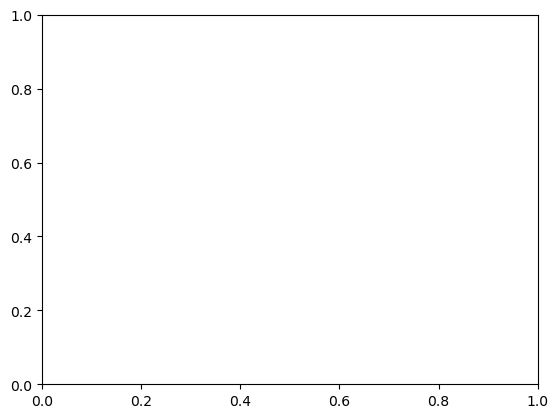

In [366]:
fig,ax = plt.subplots()

for i, (spatial, country) in enumerate(zip([True, False, True, False],['BE', 'BE', 'SWE', 'SWE'])):
    # load model
    model = initialize_SIR(country, age_classes, spatial=spatial)
    # sim model
    out=model.sim(500, method='DOP853', rtol=1e-4)
    # quick and dirty linestyle/color
    if country == 'BE':
        color = 'black'
        n=11.59e6
    else:
        color = 'red'
        n=10.42e6
    if spatial == False:
        linestyle = '-'
    else:
        linestyle = '--'
    # visualize
    ax.plot(out.time,out.I.sum(dim=['age_class', 'spatial_unit'])/n*100000, color=color, linestyle=linestyle)

ax.set_xlabel('time (days)')
ax.set_ylabel('Infected per 100K (-)')
plt.savefig('test.png', dpi=600)
plt.show()
plt.close()